<a href="https://colab.research.google.com/github/EgorBEremeev/SoloLearmML-coursera-deeplearning.ai/blob/master/Exercise_8_Question_with_kaggle_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [2]:
!pip install kaggle

In [6]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"egorberemeev","key":"13d8a9eacd02b125d0404596b4555c44"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!kaggle datasets download -d datamunge/sign-language-mnist



 88% 27.0M/30.8M [00:00<00:00, 21.5MB/s]
100% 30.8M/30.8M [00:00<00:00, 48.4MB/s]


In [0]:
#uploaded=files.upload()

In [0]:
import os
import zipfile

local_zip = '/content/sign-language-mnist.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/sign-language-mnist')
zip_ref.close()

In [0]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    labels = np.empty(1)
    images = np.empty([1,28,28])
    with open(filename) as training_file:
      filereader = csv.reader(training_file, delimiter=',')
      temp_labels = []
      temp_images = []
      header_row = filereader.__next__()
      #print(header_row)
      for row in filereader:
            temp_labels.append(row[0])
            pixels = row[1:785]
            image = np.array_split(pixels,28)
            temp_images.append(image)
      images = np.array(temp_images).astype(float)
      labels = np.array(temp_labels).astype(float)
    return images, labels


training_images, training_labels = get_data('/tmp/sign-language-mnist/sign_mnist_train.csv')
testing_images, testing_labels = get_data('/tmp/sign-language-mnist/sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [0]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images,3)
testing_images = np.expand_dims(testing_images,3)

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

In [0]:


# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 30,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_generator = train_datagen.flow(training_images, training_labels, batch_size=32)

validation_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 30,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_generator = validation_datagen.flow(testing_images, testing_labels, batch_size=32)
    


In [0]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
    ])

# Compile Model. 
model.compile(optimizer=RMSprop(lr=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# Train the Model
batch_size = 64
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=batch_size),
                              steps_per_epoch=len(training_images) / batch_size,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=batch_size),
                              validation_steps=len(testing_images) / batch_size)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


W0807 19:33:42.591364 139757305481088 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/15
429/428 [==============================] - 18s 41ms/step - loss: 2.7570 - acc: 0.1705 - val_loss: 2.3785 - val_acc: 0.2772
Epoch 2/15
429/428 [==============================] - 15s 35ms/step - loss: 2.1242 - acc: 0.3382 - val_loss: 2.0898 - val_acc: 0.3370
Epoch 3/15
429/428 [==============================] - 15s 34ms/step - loss: 1.7205 - acc: 0.4498 - val_loss: 1.6151 - val_acc: 0.4782
Epoch 4/15
429/428 [==============================] - 15s 34ms/step - loss: 1.4471 - acc: 0.5361 - val_loss: 1.3870 - val_acc: 0.5442
Epoch 5/15
429/428 [==============================] - 15s 35ms/step - loss: 1.2298 - acc: 0.6025 - val_loss: 1.3122 - val_acc: 0.5714
Epoch 6/15
429/428 [==============================] - 15s 34ms/step - loss: 1.0683 - acc: 0.6522 - val_loss: 1.0669 - val_acc: 0.6486
Epoch 7/15
429/428 [==============================] - 15s 35ms/step - loss: 0.9286 - acc: 0.6985 - val_loss: 0.9868 - val_acc: 0.6606
Epoch 8/15
429/428 [==============================] - 15s 34ms

[6.92426086682151, 0.56609035]

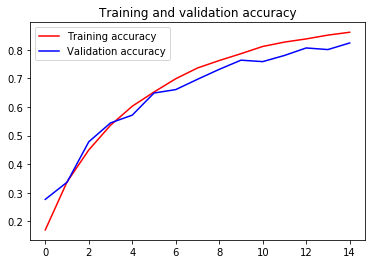

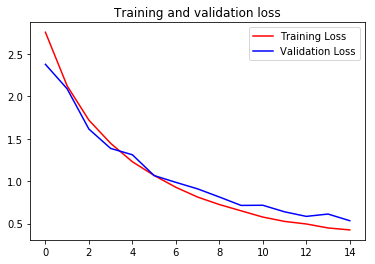

In [0]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()